Importowanie bibliotek

In [31]:
import matplotlib.pyplot as plt
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings

sns.set(style='whitegrid')
warnings.filterwarnings('ignore')

Importowanie zestawu danych (wine)

In [32]:
data = pd.read_csv('wine.csv')
X_data = data.iloc[:, 0:13]
Y_data = data.iloc[:, 13].values
feature_names = X_data.columns

X_data.head()

Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0    14.23        1.71  2.43  15.6  127     2.80        3.06   
1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2    13.16        2.36  2.67  18.6  101     2.80        3.24   
3    14.37        1.95  2.50  16.8  113     3.85        3.49   
4    13.24        2.59  2.87  21.0  118     2.80        2.69   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                  0.28     2.29       5.64  1.04  3.92     1065  
1                  0.26     1.28       4.38  1.05  3.40     1050  
2                  0.30     2.81       5.68  1.03  3.17     1185  
3                  0.24     2.18       7.80  0.86  3.45     1480  
4                  0.39     1.82       4.32  1.04  2.93      735

1. Metody filtrowania

W metodach filtrowania zmienne są wybierane niezależnie od jakichkolwiek algorytmów maszynowych. Metody filtrowania zazwyczaj używają określonych kryteriów, takich jak wyniki w teście statystycznym i wariancje, aby uszeregować ważność poszczególnych cech. Metody filtrowania mają pewne zalety:

Ze względu na ich niezależność od wyboru algorytmów uczenia maszynowego, mogą być używane jako dane wejściowe dowolnych modeli uczenia maszynowego.
Są one na ogół skuteczne w czasie obliczeń.

Główną słabością metod filtrowania jest to, że nie uwzględniają one relacji między zmiennymi. Dlatego są one używane głównie jako etap wstępnego przetwarzania dowolnego potoku wyboru zmiennych. Omówimy trzy rodzaje metod wyboru filtrów:

1.1. ANOVA F-value

Metoda ANOVA F-value szacuje stopień liniowości między zmienną wejściową (tj. predyktorem) a zmienną wyjściową. Wysoka wartość F oznacza wysoki stopień liniowości, a niska wartość F oznacza niski stopień liniowości. Główną wadą stosowania wartości F ANOVA jest to, że przechwytuje ona tylko liniowe relacje między zmiennymi wejścia i wyjścia. Innymi słowy, żadne nieliniowe relacje nie mogą być wykrywane przez wartość F.

* f_classif, które obliczają wartość F między zmiennymi wejściową i wyjściową dla zadania klasyfikacyjnego
* f_regression, które obliczają wartość F między zmiennymi wejściową i wyjściową dla zadania klasyfikacyjnego

In [33]:
f_value = f_classif(X_data, Y_data)
for feature in zip(feature_names, f_value[0]):
    print(feature)

('Alcohol', 135.07762424283948)
('Malic.acid', 36.94342496318376)
('Ash', 13.312901199989989)
('Acl', 35.77163740730817)
('Mg', 12.429584338150178)
('Phenols', 93.73300962036775)
('Flavanoids', 233.92587268154838)
('Nonflavanoid.phenols', 27.575417146965727)
('Proanth', 30.27138317022791)
('Color.int', 120.66401844100372)
('Hue', 101.31679539029965)
('OD', 189.97232057888206)
('Proline', 207.92037390217828)


Wizualizujemy wyniki, tworząc wykres słupkowy.

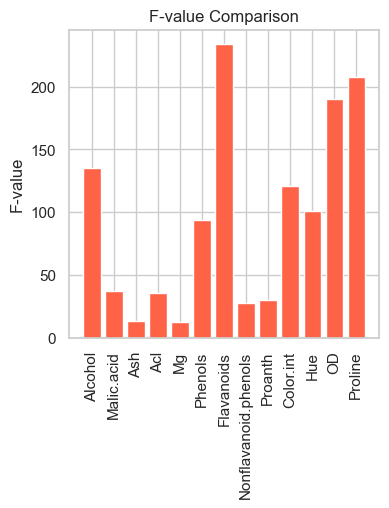

In [34]:
plt.figure(figsize=(4, 4))
plt.bar(x=feature_names, height=f_value[0], color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('F-value')
plt.title('F-value Comparison')
plt.show()

1.2. Variance Threshold

Metoda progu wariancji usuwa zmienne, których wariancja jest niższa niż wstępnie zdefiniowana wartość odcięcia. Opiera się na założeniu, że zmienne, które same w sobie nie różnią się zbytnio, mają niską moc predykcyjną. Główną słabością progu wariancji jest to, że nie uwzględnia on relacji zmiennych wejściowych ze zmienną wyjściową.

Należy zauważyć, że przed wykonaniem progu wariancji wszystkie zmienne powinny być standaryzowane, aby miały tę samą skalę.

In [35]:
selector = VarianceThreshold()
selector.fit_transform(X_data)
for feature in zip(feature_names, selector.variances_):
    print(feature)

('Alcohol', 0.6553597304633255)
('Malic.acid', 1.2410040809241256)
('Ash', 0.0748418002777427)
('Acl', 11.09003061482136)
('Mg', 92.0)
('Phenols', 0.3894890323191517)
('Flavanoids', 0.9921135115515718)
('Nonflavanoid.phenols', 0.015401619113748264)
('Proanth', 0.32575424820098475)
('Color.int', 5.344255847629093)
('Hue', 0.051951449690695616)
('OD', 0.501254462820351)
('Proline', 1402.0)


Wizualizujemy wyniki, tworząc wykres słupkowy.

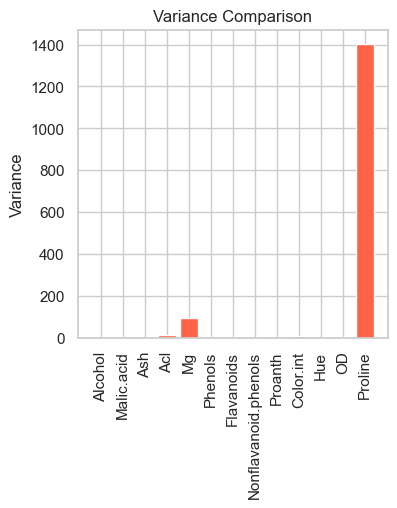

In [36]:
plt.figure(figsize=(4,4))
plt.bar(x=feature_names, height=selector.variances_, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('Variance')
plt.title('Variance Comparison')
plt.show()

Domyślnie VarianceThreshold usuwa tylko zmienne wariancji = 0. Zmienna o zerowej wariancji oznacza, że zmienna ma tę samą wartość we wszystkich wystąpieniach. Załóżmy, że chcemy wyeliminować zmienne, które mają wynik wariancji poniżej 0,2, czyli określamy parametr progowy.

In [37]:
selector = VarianceThreshold(threshold=0.2)
X_data_new = selector.fit_transform(X_data)
print(f'Number of features before variance thresholding: {X_data.shape[1]}')
print(f'Number of features after variance thresholding: {X_data_new.shape[1]}')

Number of features before variance thresholding: 13
Number of features after variance thresholding: 10


1.3. Mutual Information

Wzajemne informacje (MI) mierzą zależność jednej zmiennej od drugiej, określając ilościowo ilość informacji uzyskanych o jednej zmiennej, poprzez drugą cechę. MI jest symetryczne i nieujemne i wynosi 0 wtedy i tylko wtedy, gdy zmienne wejścia i wyjścia są niezależne. W przeciwieństwie do wartości F ANOVA, Wzajemne informacje mogą przechwytywać nieliniowe relacje między zmiennymi wejścia i wyjścia.

* mutual_info_classif, które obliczają MI dla zadania klasyfikacyjnego
* mutual_info_regression, które obliczają MI dla zadania regresji

In [38]:
MI_score = mutual_info_classif(X_data, Y_data, random_state=0)
for feature in zip(feature_names, MI_score):
    print(feature)

('Alcohol', 0.4731586922796116)
('Malic.acid', 0.26923683289624445)
('Ash', 0.08215213872550398)
('Acl', 0.26176232873202077)
('Mg', 0.18065380862660052)
('Phenols', 0.40397339152412615)
('Flavanoids', 0.6664147135656704)
('Nonflavanoid.phenols', 0.11256429740887586)
('Proanth', 0.2956602978088432)
('Color.int', 0.5517594915785269)
('Hue', 0.44640885349275616)
('OD', 0.5056374221639404)
('Proline', 0.5666704889051473)


Wizualizujemy wyniki, tworząc wykres słupkowy.

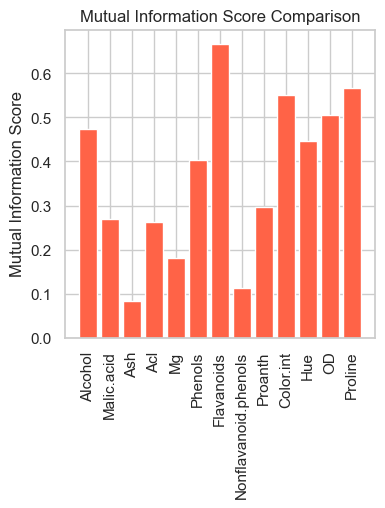

In [39]:
plt.figure(figsize=(4, 4))
plt.bar(x=feature_names, height=MI_score, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Score Comparison')
plt.show()

1.4. Using Selector Object for Selecting Features

Możemy użyć SelectKBest z Scikit-learn do wyboru zmiennych według k najwyższych wyników, określonych metodą filtrowania. Alternatywą dla SelectKBest jest użycie SelectPercentile, które wybiera zmienne według percentyla najwyższych wyników.

SelectKBest ma dwa ważne parametry:
* score_func: Funkcja filtrowania używana do wyboru zmiennej
* k: Liczba najważniejszych zmiennych do selekcji

Zademonstrujmy SelectKBest przy użyciu ANOVA F-value jako naszej metody filtrowania. Wybierzemy dwie najważniejsze funkcje na podstawie wartości F ANOVA.

In [40]:
skb = SelectKBest(score_func=f_classif, k=2)
X_data_new = skb.fit_transform(X_data, Y_data)

print(f'Number of features before selection: {X_data.shape[1]}')
print(f'Number of features after selection: {X_data_new.shape[1]}')

Number of features before selection: 13
Number of features after selection: 2


Możemy zidentyfikować nazwę wybranych cech, wywołując metodę get_support.

In [41]:
for feature_list_index in skb.get_support(indices=True):
    print('- ' + feature_names[feature_list_index])

- Flavanoids
- Proline


2. Wrapper Methods

Wrapper methods próbują znaleźć podzbiór zmiennych, które zapewniają najlepszą wydajność modelu, trenując, oceniając i porównując model z różnymi kombinacjami zmiennych. Metody wrapped umożliwiają wykrywanie relacji między zmiennymi. Mogą być jednak kosztowne obliczeniowo, zwłaszcza jeśli liczba zmiennych jest wysoka. Ryzyko nadmiernego dopasowania jest również wysokie, jeśli liczba wystąpień w zbiorze danych jest niewystarczająca.

Omówimy trzy metody owijania (wrapped):

2.1. Wyczerpujący wybór funkcji (EFS)

System EFS wyszukuje najlepszy podzbiór zmiennych, oceniając wszystkie ich kombinacje. EFS wybiera podzbiór, który generuje najlepszą wydajność (np. dokładność, precyzję, przywołanie itp.) rozważanego modelu.

EFS ma pięć ważnych parametrów:
* Estymator: klasyfikator, który zamierzamy szkolić
* min_features: minimalna liczba zmiennych do wyboru
* max_features: maksymalna liczba zmiennych do wyboru
* Scoring: metryka używana do oceny klasyfikatora
* CV: liczba walidacji krzyżowych do wykonania

In [42]:
lr = LogisticRegression()
efs = EFS(
    estimator=lr,
    min_features=1,
    max_features=4,
    scoring='accuracy',
    cv=5,
)
efs = efs.fit(X_data, Y_data)

print(f'Best accuracy score: {efs.best_score_:.2f}')
print(f'Best subset (indices): {efs.best_idx_}')
print(f'Best subset (corresponding names): {efs.best_feature_names_}')

Features: 1092/1092

Best accuracy score: 0.96
Best subset (indices): (0, 2, 3, 6)
Best subset (corresponding names): ('Alcohol', 'Ash', 'Acl', 'Flavanoids')


Możemy przekształcić zbiór danych w nowy zestaw danych zawierający tylko podzbiór zmiennych, który generuje najlepszy wynik za pomocą metody transform.

In [43]:
X_data_new = efs.transform(X_data)

print(f'Number of features before transformation: {X_data.shape[1]}')
print(f'Number of features after transformation: {X_data_new.shape[1]}')

Number of features before transformation: 13
Number of features after transformation: 4


Możemy zobaczyć wydajność każdego podzbioru zmiennych, wywołując get_metric_dict.

In [44]:
efs_results = pd.DataFrame.from_dict(efs.get_metric_dict()).T
efs_results.sort_values(by='avg_score', ascending=True, inplace=True)
efs_results

feature_idx                                          cv_scores  \
7               (7,)  [0.4722222222222222, 0.3333333333333333, 0.416...   
2               (2,)  [0.4166666666666667, 0.5, 0.5, 0.4, 0.48571428...   
1               (1,)  [0.5, 0.5277777777777778, 0.5, 0.5714285714285...   
30            (1, 7)  [0.5555555555555556, 0.5277777777777778, 0.388...   
4               (4,)  [0.4444444444444444, 0.5277777777777778, 0.5, ...   
...              ...                                                ...   
1063   (6, 7, 9, 12)  [0.8888888888888888, 0.9444444444444444, 0.944...   
496    (0, 3, 6, 11)  [0.8333333333333334, 0.9444444444444444, 0.972...   
860   (2, 6, 10, 12)  [0.9166666666666666, 0.9166666666666666, 0.916...   
942    (3, 6, 9, 12)  [0.8333333333333334, 0.9722222222222222, 0.944...   
434     (0, 2, 3, 6)  [0.8611111111111112, 1.0, 0.9444444444444444, ...   

     avg_score                                      feature_names  ci_bound  \
7     0.444444                            (Nonflavanoid.phenols,)  0.088555   
2     0.460476                                             (Ash,)  0.055544   
1     0.488413                                      (Malic.acid,)  0.099386   
30    0.511587                 (Malic.acid, Nonflavanoid.phenols)  0.092213   
4     0.517302                                              (Mg,)  0.064432   
...        ...                                                ...       ...   
1063  0.944127  (Flavanoids, Nonflavanoid.phenols, Color.int, ...  0.045168   
496   0.944286                     (Alcohol, Acl, Flavanoids, OD)  0.074794   
860   0.944286                    (Ash, Flavanoids, Hue, Proline)  0.045001   
942   0.944286              (Acl, Flavanoids, Color.int, Proline)  0.074794   
434   0.955397                    (Alcohol, Ash, Acl, Flavanoids)  0.066154   

       std_dev   std_err  
7     0.068899  0.034449  
2     0.043215  0.021608  
1     0.077326  0.038663  
30    0.071745  0.035872  
4     0.050131  0.025065  
...        ...       ...  
1063  0.035142  0.017571  
496   0.058192  0.029096  
860   0.035012  0.017506  
942   0.058192  0.029096  
434    0.05147  0.025735  

[1092 rows x 7 columns]

Wizualizujmy wydajność każdego podzestawu zmiennych, tworząc poziomy wykres słupkowy:

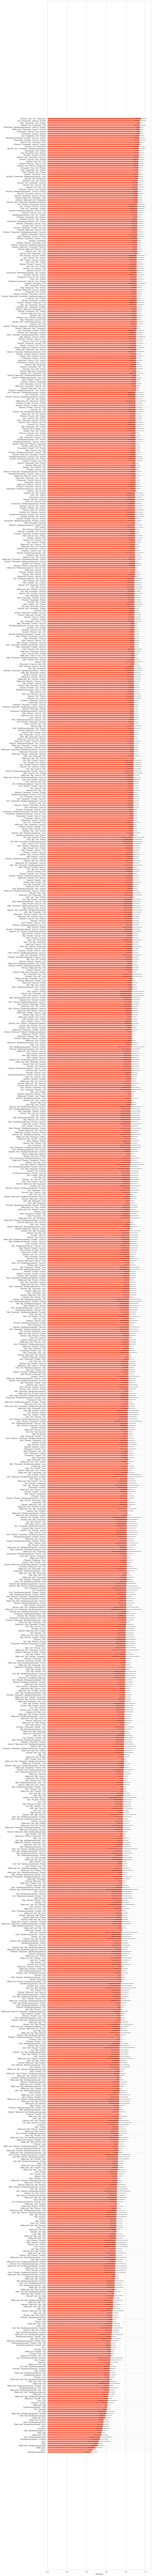

In [45]:
fig, ax = plt.subplots(figsize=(12, 300))
Y_pos = np.arange(len(efs_results))
ax.barh(
    Y_pos,
    efs_results['avg_score'],
    xerr=efs_results['std_dev'],
    color='tomato',
)
ax.set_yticks(Y_pos)
ax.set_yticklabels(efs_results['feature_names'])
ax.set_xlabel('Accuracy')
plt.show()

2.2. Sekwencyjny wybór do przodu (SFS)
SFS znajduje najlepszy podzbiór zmiennych, dodając zmienną, która najlepiej poprawia model przy każdej iteracji.

SFS ma pięć ważnych parametrów:
* estimator: klasyfikator, który zamierzamy szkolić
* k_features: Liczba zmiennych do wyboru. Można podać krotkę zawierającą wartość min i max, a SFS rozważy zwrócenie dowolnej kombinacji zmiennych między min i max, która uzyskała najwyższy wynik w walidacji krzyżowej.
* forward: użyj SFS, jeśli True i użyj SBS, jeśli False
* scoring: metryka używana do oceny klasyfikatora
* cv: liczbę walidacji krzyżowych do przeprowadzenia



In [46]:
lr = LogisticRegression()
sfs = SFS(
    estimator=lr,
    k_features=(1, 4),
    forward=True,
    scoring='accuracy',
    cv=5,
)
sfs = sfs.fit(X_data, Y_data)

print(f'Best accuracy score: {sfs.k_score_:.2f}')
print(f'Best subset (indices): {sfs.k_feature_idx_}')
print(f'Best subset (corresponding names): {sfs.k_feature_names_}')

Best accuracy score: 0.96
Best subset (indices): (0, 2, 3, 6)
Best subset (corresponding names): ('Alcohol', 'Ash', 'Acl', 'Flavanoids')


In [47]:
X_data_new = sfs.transform(X_data)

print(f'Number of features before transformation: {X_data.shape[1]}')
print(f'Number of features after transformation: {X_data_new.shape[1]}')

Number of features before transformation: 13
Number of features after transformation: 4


In [48]:
sfs_results = pd.DataFrame.from_dict(sfs.subsets_).T
sfs_results

feature_idx                                          cv_scores avg_score  \
1          (6,)  [0.6944444444444444, 0.8888888888888888, 0.694...  0.798413   
2        (0, 6)  [0.8333333333333334, 0.9166666666666666, 0.944...  0.916032   
3     (0, 3, 6)  [0.8611111111111112, 0.8611111111111112, 0.972...  0.933175   
4  (0, 2, 3, 6)  [0.8611111111111112, 1.0, 0.9444444444444444, ...  0.955397   

                     feature_names  
1                    (Flavanoids,)  
2            (Alcohol, Flavanoids)  
3       (Alcohol, Acl, Flavanoids)  
4  (Alcohol, Ash, Acl, Flavanoids)

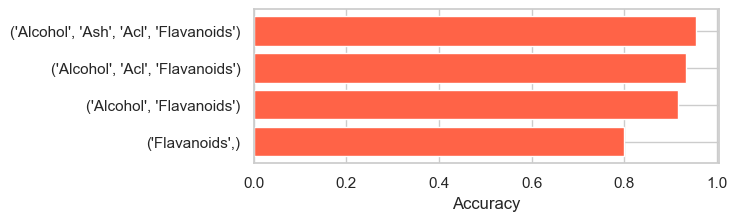

In [49]:
fig, ax = plt.subplots(figsize=(6, 2))
Y_pos = np.arange(len(sfs_results))
ax.barh(
    Y_pos,
    sfs_results['avg_score'],
    color='tomato',
)
ax.set_yticks(Y_pos)
ax.set_yticklabels(sfs_results['feature_names'])
ax.set_xlabel('Accuracy')
plt.show()

2.3. Sekwencyjny wybór wsteczny (SBS)
SBS jest przeciwieństwem SFS. SBS rozpoczyna od wszystkich operacji i usuwa tą zmienną, która ma najmniejsze znaczenie dla modelu w każdej iteracji.

In [50]:
lr = LogisticRegression()
sbs = SFS(
    estimator=lr,
    k_features=(1, 4),
    forward=False,
    scoring='accuracy',
    cv=5,
)
sbs = sbs.fit(X_data, Y_data)

print(f'Best accuracy score: {sbs.k_score_:.2f}')
print(f'Best subset (indices): {sbs.k_feature_idx_}')
print(f'Best subset (corresponding names): {sbs.k_feature_names_}')

Best accuracy score: 0.94
Best subset (indices): (3, 6, 9, 12)
Best subset (corresponding names): ('Acl', 'Flavanoids', 'Color.int', 'Proline')


In [51]:
X_data_new = sbs.transform(X_data)

print(f'Number of features before transformation: {X_data.shape[1]}')
print(f'Number of features after transformation: {X_data_new.shape[1]}')

Number of features before transformation: 13
Number of features after transformation: 4


In [52]:
sbs_results = pd.DataFrame.from_dict(sbs.subsets_).T
sbs_results

feature_idx  \
13  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)   
12     (0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)   
11         (0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 12)   
10            (0, 1, 3, 4, 5, 6, 7, 9, 10, 12)   
9                (0, 1, 3, 5, 6, 7, 9, 10, 12)   
8                   (0, 1, 3, 5, 6, 9, 10, 12)   
7                      (0, 1, 3, 6, 9, 10, 12)   
6                          (0, 1, 3, 6, 9, 12)   
5                             (1, 3, 6, 9, 12)   
4                                (3, 6, 9, 12)   
3                                   (6, 9, 12)   
2                                      (6, 12)   
1                                         (6,)   

                                            cv_scores avg_score  \
13  [0.8888888888888888, 0.9444444444444444, 0.944...  0.955556   
12  [0.8888888888888888, 0.9444444444444444, 0.972...  0.961111   
11  [0.8888888888888888, 0.9444444444444444, 0.944...  0.955556   
10  [0.9166666666666666, 0.9444444444444444, 0.944...  0.961111   
9   [0.9444444444444444, 0.9444444444444444, 0.944...  0.966667   
8   [0.9444444444444444, 0.9444444444444444, 0.944...  0.966667   
7   [0.9444444444444444, 0.9722222222222222, 0.944...  0.972222   
6   [0.9444444444444444, 0.9722222222222222, 0.944...  0.972222   
5   [0.8888888888888888, 0.9444444444444444, 0.916...  0.944286   
4   [0.8333333333333334, 0.9722222222222222, 0.944...  0.944286   
3   [0.8888888888888888, 0.9166666666666666, 0.972...  0.944127   
2   [0.8055555555555556, 0.8888888888888888, 0.833...  0.894127   
1   [0.6944444444444444, 0.8888888888888888, 0.694...  0.798413   

                                        feature_names  
13  (Alcohol, Malic.acid, Ash, Acl, Mg, Phenols, F...  
12  (Alcohol, Malic.acid, Acl, Mg, Phenols, Flavan...  
11  (Alcohol, Malic.acid, Acl, Mg, Phenols, Flavan...  
10  (Alcohol, Malic.acid, Acl, Mg, Phenols, Flavan...  
9   (Alcohol, Malic.acid, Acl, Phenols, Flavanoids...  
8   (Alcohol, Malic.acid, Acl, Phenols, Flavanoids...  
7   (Alcohol, Malic.acid, Acl, Flavanoids, Color.i...  
6   (Alcohol, Malic.acid, Acl, Flavanoids, Color.i...  
5   (Malic.acid, Acl, Flavanoids, Color.int, Proline)  
4               (Acl, Flavanoids, Color.int, Proline)  
3                    (Flavanoids, Color.int, Proline)  
2                               (Flavanoids, Proline)  
1                                       (Flavanoids,)

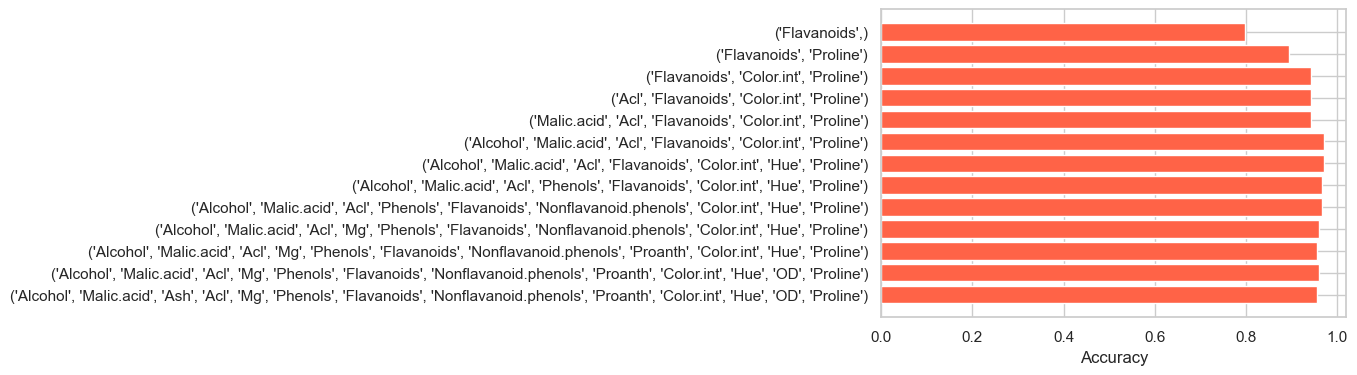

In [53]:
fig, ax = plt.subplots(figsize=(6, 4))
Y_pos = np.arange(len(sbs_results))
ax.barh(
    Y_pos,
    sbs_results['avg_score'],
    color='tomato'
)
ax.set_yticks(Y_pos)
ax.set_yticklabels(sbs_results['feature_names'])
ax.set_xlabel('Accuracy')
plt.show()

Porównajmy selekcję zmiennych wygenerowaną przez EFS, SFS i SBS.

W tym prostym scenariuszu, wybierając najlepszą kombinację zmiennych spośród 4 dostępnych zmiennych w zestawie Iris, otrzymujemy podobne wyniki niezależnie od tego, jakich algorytmów selekcji użyliśmy. W innych przypadkach z większym zbiorem danych i większą liczbą zmiennych wybór jest wysoce prawdopodobny, że będzie inny dla każdego algorytmu selekcji.

In [54]:
print(f'Best subset by EFS: {efs.best_feature_names_}')
print(f'Best subset by SFS: {sfs.k_feature_names_}')
print(f'Best subset by SBS: {sbs.k_feature_names_}')

Best subset by EFS: ('Alcohol', 'Ash', 'Acl', 'Flavanoids')
Best subset by SFS: ('Alcohol', 'Ash', 'Acl', 'Flavanoids')
Best subset by SBS: ('Acl', 'Flavanoids', 'Color.int', 'Proline')


3. Metody wbudowane

Metody wbudowane (embedded) łączą mocne strony metod filtrowania i wrapped, wykorzystując algorytmy maszynowe, które mają własny wbudowany proces wyboru zmiennych. Integrują one krok wyboru zmiennej jako część procesu uczenia (tj. wybór zmiennej i proces uczenia są wykonywane jednocześnie). Metody osadzone mają na ogół bardziej wydajny proces niż metody wrapping, ponieważ eliminują potrzebę ponownego trenowania każdego podzbioru badanych zmiennych. Niektóre algorytmy maszynowe, które można wykorzystać do wyboru zmiennych, to:

* LASSO regression
* Ridge regression
* Decision tree
* Random forest
* Support vector machine

3.1. Feature Selection Using Random Forest
Las losowy jest jednym z najpopularniejszych algorytmów uczenia się używanych do selekcji zmiennych w procesie uczenia danych. Jak wyjaśnił Chris Albon:

Musimy podzielić nasz zestaw danych na podział na train i test, ponieważ wybór funkcji jest częścią procesu szkolenia.

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.3, random_state=0)

Jeśli zsumujemy wszystkie wyniki ważności, wynik wynosi 1 (100%).

In [56]:
rfc = RandomForestClassifier(random_state=0, criterion='gini')
rfc.fit(X_train, Y_train)

for feature in zip(feature_names, rfc.feature_importances_):
    print(feature)

('Alcohol', 0.08874680417464678)
('Malic.acid', 0.02978162225833429)
('Ash', 0.01663816502242051)
('Acl', 0.039189944896389294)
('Mg', 0.022961768966889996)
('Phenols', 0.06157894335524699)
('Flavanoids', 0.1452282715474674)
('Nonflavanoid.phenols', 0.014258178736917097)
('Proanth', 0.0231074613019167)
('Color.int', 0.19481936739572966)
('Hue', 0.08026645353404331)
('OD', 0.11907506442694837)
('Proline', 0.16434795438304953)


3.2. Using Selector Object for Selecting Features

SelectFromModel ma dwa ważne parametry:
* estimator: Algorytm uczenia maszynowego używany do selekcji zmiennych
* threshold: Wartość progowa używana do wyboru zmiennych. Zmienne, których znaczenie jest większe lub równe, są zachowywane, podczas gdy inne są odrzucane.

Zademonstrujmy SelectFromModel za pomocą losowego klasyfikatora lasów o znaczeniu gini. Wybierzemy zmienne, które mają znaczenie powyżej 0,1.

In [57]:
rfc = RandomForestClassifier(random_state=0, criterion='gini')
sfm = SelectFromModel(estimator=rfc, threshold=0.1)
sfm = sfm.fit(X_train, Y_train)

print('The most important features based on random forest classifier:')
for feature_list_index in sfm.get_support(indices=True):
    print('- ' + feature_names[feature_list_index])

The most important features based on random forest classifier:
- Flavanoids
- Color.int
- OD
- Proline


Możemy przekształcić zbiór danych w nowy zbiór danych zawierający tylko najważniejsze zmienne za pomocą metody transform.

In [58]:
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

print(f'Number of features before tranformation: {X_train.shape[1]}')
print(f'Number of features after tranformation: {X_important_train.shape[1]}')

Number of features before tranformation: 13
Number of features after tranformation: 4


3.3. Porównanie dokładności klasyfikatora z pełnymi funkcjami i ograniczonymi funkcjami

Porównajmy dokładność klasyfikatora z pełnymi zmiennymi i klasyfikatora z ograniczonymi zmiennymi (tj. dwie najważniejsze funkcje oparte na losowym klasyfikatorze lasu).

In [59]:
rfc_full = RandomForestClassifier(random_state=0, criterion='gini')
rfc_full.fit(X_train, Y_train)
pred_full = rfc_full.predict(X_test)

print(f'The Accuracy of classifier with full features: {accuracy_score(Y_test, pred_full):.2f}')

The Accuracy of classifier with full features: 0.98


Widać, że możemy zmniejszyć liczbę zmiennych bez znacznego obniżenia wydajności modelu.

In [60]:
rfc_lim = RandomForestClassifier(random_state=0, criterion='gini')
rfc_lim.fit(X_important_train, Y_train)
pred_lim = rfc_lim.predict(X_important_test)
print(f'The Accuracy of classifier with full features: {accuracy_score(Y_test, pred_lim):.2f}')

The Accuracy of classifier with full features: 0.98
